In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def normalize(X):
    
    num = X.shape[1]

    NormParams = np.zeros((2, num))
    NormParams[0] = X.mean(axis=0)
    NormParams[1] = X.std(axis=0, ddof=1)

    X = (X - NormParams[0]) / NormParams[1]

    return X, NormParams

In [3]:
def transform(X, accuracity=0.95):
    
    cov = np.dot(X.T, X) / (len(X) - 1)
    
    e_val, e_vect = np.linalg.eig(cov)
    
    e_val = np.absolute(e_val)
    
    ind = np.argsort(-e_val)
    e_val = e_val[ind]
    
    e_vect = e_vect[:, ind]
    e_vect = e_vect.astype(float)
    
    weight = e_val / sum(e_val)
    cum_weight = np.cumsum(weight)
    
    n_components = len(np.argwhere(cum_weight < accuracity)) + 1
    
    e_vect_reduced = e_vect[:, :n_components]
    new_X = np.dot(X, e_vect_reduced)
    return new_X, e_vect_reduced

In [32]:
def restore(X_reduced, evect_reduced, norm_params):
    
    restored = np.dot(X_reduced, evect_reduced.T)
    restored = (restored * norm_params[1] ) + norm_params[0]
    return restored

## All processing

### Simple data

In [33]:
points = 10
X = np.zeros((points,2))
x = np.arange(1,points+1)
y = 4 * x *x + np.random.randn(points)*2
X[:,1] = y
X[:,0] = x

In [34]:
# normalization
X_norm, norm_params = normalize(np.copy(X))

# dimension reduction
X_reduced, evect_reduced = transform(X_norm, 0.9)
# restoring dimensions
restored_X = restore(X_reduced, evect_reduced,norm_params )

### Visualization

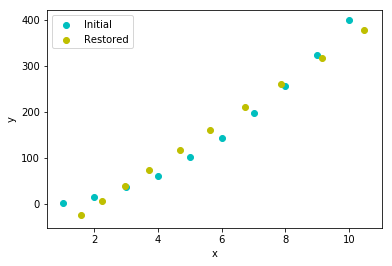

In [35]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], color='c', label='Initial')
plt.scatter(restored_X[:, 0], restored_X[:, 1], color='y', label='Restored')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Try use PCA on image

In [141]:
from PIL import Image
accuracity = 0.99

# read image 
img = Image.open('pct.jpg')

# create numpy array
img_RGB = (np.copy(np.asarray(img))).astype(float)

X_restored_img = np.zeros(img_RGB.shape)

for i in range(img_RGB.shape[2]):

    img_X = img_RGB[:,:,i]
    # normalization
    X_norm_img, norm_params = normalize(img_X)

    # dimension reduction
    X_reduced_img, evect_reduced = transform(X_norm_img, accuracity)

    # dimension restoring
    X_restored_img[:,:,i] = restore(X_reduced_img, evect_reduced, norm_params)

# create from restored array
X_restored_img[X_restored_img < 0] = 0
X_restored_img[X_restored_img > 255] = 255
restored_img = Image.fromarray(X_restored_img.astype(np.uint8), mode='RGB')

# img.show()
# restored_img.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


In [142]:
img.show()
restored_img.show()